In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/GTerrence/dataset/main/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
for i in range(len(df)):
    if df['Age'][i] < 18:
        df['Age'][i] = 0
    else:
        df['Age'][i] = 1
df.head()


/var/folders/9s/cfr9spcd2s597lpq2t4x0y040000gq/T/ipykernel_34430/1916149024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = 1
/var/folders/9s/cfr9spcd2s597lpq2t4x0y040000gq/T/ipykernel_34430/1916149024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,1.0,0,0,373450,8.0500,NaN,S


In [42]:
# Determine data types
data_types = df.dtypes
print("\nData Types:")
print(data_types)


Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [43]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [44]:
# Check the balance of the target variable "Survived"
target_balance = df['Survived'].value_counts()
print("\nTarget Variable (Survived) Balance:")
print(target_balance)


Target Variable (Survived) Balance:
0    549
1    342
Name: Survived, dtype: int64


In [45]:
df.dropna(subset=['Cabin'], inplace=True) 
df.dropna(subset=['Embarked'], inplace=True)

In [46]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [47]:
mappings = {}

# Specify the categorical columns you want to encode
categorical_columns = ['Sex', 'Embarked']


mappings_before = {}
for column in categorical_columns:
    mapping = dict(enumerate(df[column].astype('category').cat.categories))
    mappings_before[column] = mapping

# Create mappings after encoding
mappings_after = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    mapping = dict(enumerate(label_encoder.classes_))
    mappings_after[column] = mapping

# Display mappings before and after encoding
for column in categorical_columns:
    print(f"Mapping for {column} (Before Encoding):")
    print(mappings_before[column])
    print(f"Mapping for {column} (After Encoding):")
    print(mappings_after[column])

Mapping for Sex (Before Encoding):
{0: 0, 1: 1}
Mapping for Sex (After Encoding):
{0: 0, 1: 1}
Mapping for Embarked (Before Encoding):
{0: 'C', 1: 'Q', 2: 'S'}
Mapping for Embarked (After Encoding):
{0: 'C', 1: 'Q', 2: 'S'}


Mean Age: 0.905940594059406
Median Age: 1.0
Maximum Age: 1.0
Minimum Age: 0.0


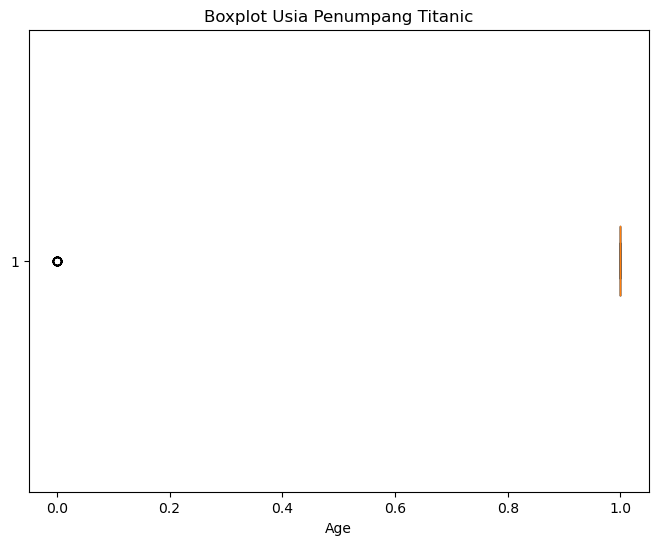

In [48]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'], vert=False)
plt.title('Boxplot Usia Penumpang Titanic')
plt.xlabel('Age')

print('Mean Age:', df['Age'].mean())  # mean age of passengers
print('Median Age:', df['Age'].median())  # median age of passengers
print('Maximum Age:', df['Age'].max())  # maximum age of passenger
print('Minimum Age:', df['Age'].min())  # minimum age of passenger


In [49]:
# Define features and target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Encode categorical variables (e.g., 'Sex' and 'Embarked')
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['Embarked'] = le.fit_transform(X['Embarked'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/9s/cfr9spcd2s597lpq2t4x0y040000gq/T/ipykernel_34430/3822178232.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = le.fit_transform(X['Sex'])
/var/folders/9s/cfr9spcd2s597lpq2t4x0y040000gq/T/ipykernel_34430/3822178232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = le.fit_transform(X['Embarked'])


In [50]:
# Menormalkan data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model regresi logistik
model = LogisticRegression()
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8048780487804879
Confusion Matrix:
[[ 7  1]
 [ 7 26]]


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Membaca dataset dari URL
url = "https://raw.githubusercontent.com/GTerrence/dataset/main/Titanic-Dataset.csv"
data = pd.read_csv(url)

# Ubah label 'Survived' menjadi 0 dan 1
le = LabelEncoder()
data['Survived'] = le.fit_transform(data['Survived'])

# Memilih fitur yang akan digunakan untuk prediksi
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X = data[features]
y = data['Survived']

# Mengkonversi kolom 'Sex' dan 'Embarked' menjadi variabel dummy
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Memproses data yang hilang (misalnya mengisi nilai yang hilang dalam kolom 'Age' dengan nilai median)
X['Age'].fillna(X['Age'].median(), inplace=True)

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model pohon keputusan ID3
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.7932960893854749
Confusion Matrix:
[[87 18]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179

